In [1]:
from br_demography  import municipality_migration as mm
from br_demography  import municipality_births as mb
import basedosdados as bd
from dotenv import load_dotenv
import os
import pandas as pd # importação de biblioteca de manipulação de dados tabulares
import matplotlib.pyplot as plt # importação de biblioteca de plotagem de gráficos 
import numpy as np # importação de biblioteca para cálculos matemáticos
from scipy.optimize import curve_fit # importação de função a ser utilizada para ajuste de modelo preditivo 
from itertools import product # importação de função voltada para otimização de laços de iteração
import warnings



# Carrega as variáveis de ambiente do arquivo .env
load_dotenv(dotenv_path='./br_demography/.env')

# Use as variáveis de ambiente conforme necessário
project_id = os.getenv('GOOGLE_CLOUD_PROJECT_ID')

## Obtenção e Tratamento de Dados

### Dados de Nascimento

In [2]:
df_births = mb.query_births(mun_id=4125506, project_id=project_id, start_year=2000, end_year=2022)
df_births

Downloading: 100%|██████████| 102880/102880 [00:02<00:00, 45707.60rows/s]


,Ano,Idade
0,2000,<NA>
1,2000,<NA>
2,2000,<NA>
3,2000,<NA>
4,2000,<NA>
...,...,...
102875,2022,45
102876,2022,46
102877,2022,46
102878,2022,47


In [3]:
df_births = mb.standard_age_groups(df=df_births, age_group_csv_path='./br_demography/source/tab/faixas_etarias_maes.csv')
df_births

Nascimentos
Ano  Faixa Etária             
2000 10 a 19 anos          955
     20 a 29 anos         2399
     30 a 39 anos         1051
     40 a 49 anos           65
2001 10 a 19 anos          933
...                        ...
2021 40 a 49 anos          154
2022 10 a 19 anos          327
     20 a 29 anos         2179
     30 a 39 anos         1587
     40 a 49 anos          167

[92 rows x 1 columns]

In [12]:
from plotly import express as px

[]

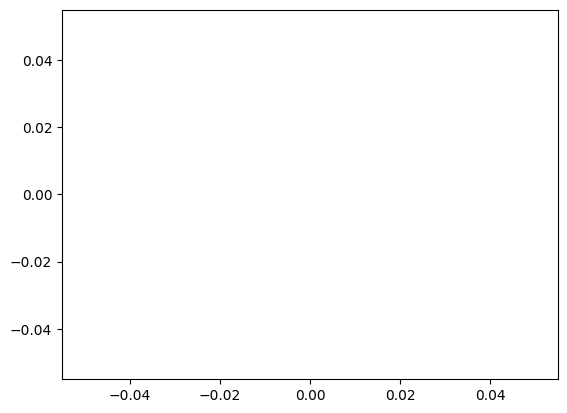

In [13]:
plt.plot()

In [6]:
df_births.reset_index().melt(id_vars=['Faixa Etária'], var_name=['Ano'], value_name='Nascimentos').groupby(by=['Ano', 'Faixa Etária'], as_index=False).sum()

,Ano,Faixa Etária,Nascimentos
0,Ano,10 a 19 anos,46253
1,Ano,20 a 29 anos,46253
2,Ano,30 a 39 anos,46253
3,Ano,40 a 49 anos,46253
4,Nascimentos,10 a 19 anos,16685
5,Nascimentos,20 a 29 anos,52891
6,Nascimentos,30 a 39 anos,30697
7,Nascimentos,40 a 49 anos,2603


px.line(
    df_births.reset_index().melt(id_vars=['Faixa Etária'], var_name=['Ano'], value_name='Nascimentos').groupby(by=['Ano', 'Faixa Etária'], as_index=False).sum()
    , x='Ano'
    ,y='Nascimentos'
    , color='Faixa Etária'
)

### Dados de População de Sexo Feminino entre 2000 e 2022 

In [7]:
df_births = df_births.reset_index().pivot_table(columns=['Ano'], index=['Faixa Etária'], values=['Nascimentos'])
df_births = df_births.droplevel(level=0, axis=1)
df_births.columns.name = None
df_births

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Faixa Etária,,,,,,,,,,,,,,,,,,,,,
10 a 19 anos,955,933,880,800,832,766,847,790,805,810,...,836,852,788,682,546,511,480,439,405,327
20 a 29 anos,2399,2351,2229,2189,2224,2149,2096,2126,2257,2254,...,2453,2495,2563,2440,2305,2293,2288,2349,2213,2179
30 a 39 anos,1051,1009,959,1001,1015,1007,1033,1045,1170,1178,...,1572,1689,1570,1621,1666,1668,1636,1631,1543,1587
40 a 49 anos,65,79,82,71,90,69,90,78,93,92,...,150,121,157,132,152,144,147,151,154,167


In [8]:
df_pop = pd.read_csv(filepath_or_buffer='./br_demography/results/tab/pop_municipios_rmc_2000_2022_estimativa_intercensitaria.csv', sep=';')
df_pop = df_pop[df_pop['Sexo'] == 'Feminino'].iloc[:,1:]
df_pop[df_pop['Faixa Etária'].isin(values=df_births.index)]
df_pop.set_index(keys=['Faixa Etária'], inplace=True)
df_pop.columns = df_pop.columns.astype(int)
df_pop


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Faixa Etária,,,,,,,,,,,,,,,,,,,,,
0 a 9 anos,3720,3661,3604,3548,3492,3437,3383,3331,3278,3227,...,3223,3239,3255,3271,3287,3303,3319,3336,3352,3369
10 a 19 anos,3517,3539,3562,3586,3609,3633,3656,3680,3704,3728,...,3677,3653,3628,3604,3579,3555,3531,3508,3484,3461
20 a 29 anos,3248,3278,3309,3340,3371,3402,3434,3466,3499,3531,...,3621,3641,3660,3679,3699,3718,3738,3758,3778,3798
30 a 39 anos,2793,2825,2858,2891,2925,2959,2993,3028,3063,3098,...,3323,3389,3456,3524,3593,3664,3736,3810,3885,3962
40 a 49 anos,1803,1872,1944,2019,2097,2178,2261,2349,2439,2533,...,2844,2919,2996,3075,3157,3240,3325,3413,3503,3596
50 a 59 anos,993,1052,1116,1183,1255,1330,1411,1496,1586,1682,...,2027,2116,2208,2305,2405,2510,2620,2735,2854,2979
60 a 69 anos,591,615,640,667,694,723,753,784,817,850,...,1085,1161,1243,1330,1423,1523,1630,1744,1867,1998
70 a 79 anos,268,282,298,315,332,351,371,391,413,436,...,547,579,613,649,687,727,770,815,863,914
80 anos ou mais,63,68,74,81,88,96,105,115,125,136,...,186,200,215,232,250,269,289,312,336,362


## Cálculo de Taxa de Fertilidade

10 a 19 anos
20 a 29 anos
30 a 39 anos
40 a 49 anos


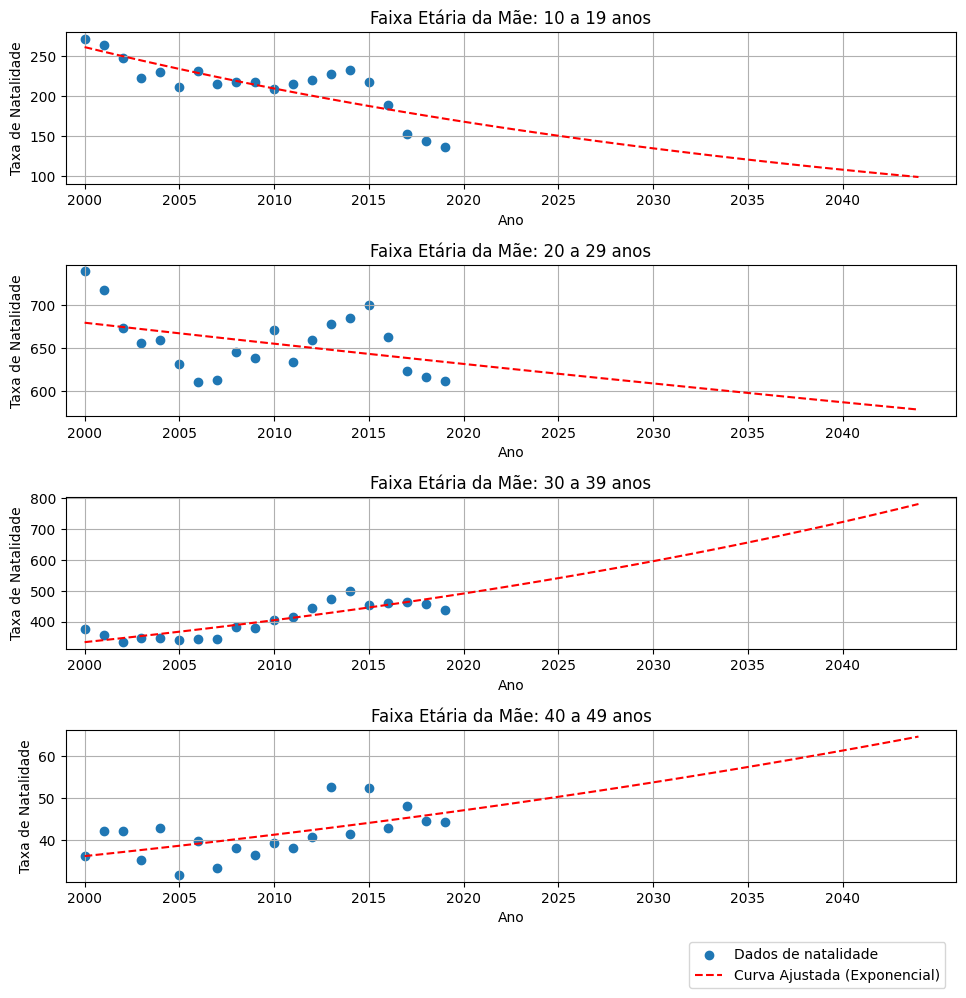

In [9]:
df_birth_rate_by_mothers_age_group = (df_births / df_pop).dropna(axis=0) * 1000
df_birth_rate_by_mothers_age_group.drop(columns=[2020, 2021, 2022], inplace=True)

# supressão de mensagens de alerta
np.seterr(over='ignore', invalid='ignore')
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Função para o modelo exponencial decrescente
def modelo_exponencial(x, constante, coeficiente):
    return constante * np.exp(coeficiente * (-x - 1))

# DataFrame de resultados
resultados = pd.DataFrame(columns=['Faixa Etária', 'Constante', 'Coeficiente'])

# Preparação de dados necessários ao lação de iteração
df_birth_rate_by_mothers_age_group.reset_index(inplace=True)
faixas_etarias = df_birth_rate_by_mothers_age_group['Faixa Etária'].unique()
num_plots = len(faixas_etarias)
num_colunas = 1
num_linhas = 4

# Criaçao de subplots para cada faixa etária
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(10, 10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)


# laço de iteração
for i, faixa_etaria in enumerate(faixas_etarias):
    print(faixa_etaria)
    if i >= num_plots:
        break  # Sair se todos os subplots já estiverem preenchidos
    
    # Filtragem do dataFrame para a faixa etária atual
    df_filtro = df_birth_rate_by_mothers_age_group[df_birth_rate_by_mothers_age_group['Faixa Etária'] == faixa_etaria]
    
    # Atribuição de dados de anos e natalidade a sua variáveis para o modelo
    anos = np.array(df_filtro.columns[1:], dtype=int) - 2000
    dados_natalidade = df_filtro.iloc[0, 1:].values.astype(float)
    
    # Ajuste do modelo exponencial aos dados
    try:
        params, _ = curve_fit(modelo_exponencial, anos, dados_natalidade, maxfev=10000)
        constante, coeficiente = params
    except RuntimeError:
        constante, coeficiente = np.nan, np.nan
    
    # Criação de um DataFrame temporário com os resultados atuais
    df_temp = pd.DataFrame({'Faixa Etária': [faixa_etaria],
                            'Constante': [constante], 'Coeficiente': [coeficiente]})
    
    # Concatenação do DataFrame temporário ao DataFrame de resultados
    resultados = pd.concat([resultados, df_temp], ignore_index=True)

    # Calculo das previsões do modelo para os anos sob análise, inclusive os futuros, para projeção
    anos_incluso_futuros = np.arange(0, 45)

    previsao = modelo_exponencial(anos_incluso_futuros, constante, coeficiente)
    
    # Plotagem os dados originais e a curva ajustada
    axs[i].scatter(anos + 2000, dados_natalidade, label='Dados de natalidade', marker='o')
    axs[i].plot(anos_incluso_futuros + 2000, previsao, label='Curva Ajustada (Exponencial)', linestyle='--', color='red')
    axs[i].set_xlabel('Ano')
    axs[i].set_ylabel('Taxa de Natalidade')
    axs[i].set_title(f'Faixa Etária da Mãe: {faixa_etaria}')
#    axs[i].legend()
    axs[i].grid(True)
    axs[i].set_xlim(1999, 2046)  # Definir limite do eixo x de 2000 a 2040
    axs[i].set_xticks(np.arange(2000, 2045, 5))  # Definir marcações no eixo x a cada 5 anos

# Add a single legend below all the plots in the right corner
plt.legend(bbox_to_anchor=(.7, -.7), loc='lower left', borderaxespad=0.)

# Exibir os subplots
plt.tight_layout()
plt.show()

In [10]:
new_columns = [*resultados.columns.tolist()]
new_columns.extend(range(2022, 2045))
resultados = resultados.reindex(columns=new_columns, fill_value=0)

for year in resultados.columns[3:].astype(int):
    resultados.loc[:,year] = year-2000

resultados = pd.concat(
    objs=[
        resultados.iloc[:,:3]
        , modelo_exponencial(resultados.iloc[:, 3:], resultados.Constante.values.reshape((4,1)), resultados.Coeficiente.values.reshape((4,1)))
        ]
    , axis=1
    
)

resultados

,Faixa Etária,Constante,Coeficiente,2022,2023,2024,2025,2026,2027,2028,...,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044
0,10 a 19 anos,267.096420,0.022051,160.843171,157.335190,153.903718,150.547086,147.263662,144.051849,140.910086,...,120.754902,118.121244,115.545026,113.024995,110.559926,108.148619,105.789904,103.482631,101.225681,99.017954
1,20 a 29 anos,681.730730,0.003642,626.949676,624.670411,622.399432,620.136710,617.882213,615.635912,613.397778,...,597.957018,595.783155,593.617195,591.459110,589.308870,587.166448,585.031814,582.904940,580.785799,578.674362
2,30 a 39 anos,327.085016,-0.019319,510.077319,520.027422,530.171623,540.513707,551.057535,561.807042,572.766240,...,655.705828,668.496714,681.537113,694.831891,708.386012,722.204533,736.292612,750.655509,765.298583,780.227301
3,40 a 49 anos,35.660175,-0.013245,48.359808,49.004593,49.657975,50.320069,50.990991,51.670858,52.359790,...,57.446483,58.212422,58.988573,59.775073,60.572059,61.379671,62.198051,63.027343,63.867692,64.719245


In [11]:
resultados.to_csv(path_or_buf='./br_demography/results/tab/natalidade_projetada_campina_2022_2044.csv', sep=';', decimal=',', encoding='utf-16')